In [3]:
# Import necessary libraries for data manipulation and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import visualkeras
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import tensorflow as tf

In [4]:
# Import your dataset preprocessing module
from preprocess import df

# Display the first few rows of the dataframe to understand its structure
print(df.head())


ModuleNotFoundError: No module named 'preprocess'

In [ ]:
# Define the features and target variable for the classification task
features = ['Startposisjon bredde', 'Startposisjon lengde', 'Redskap FDIR (kode)', 'Rundvekt']
X = df[features]  # Input features
y = df['Art - FDIR']  # Target variable

# Initialize a standard scaler and apply it to the features to normalize them
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)


In [ ]:
# Build the neural network model
model = tf.keras.models.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=[len(features)]),  # Input layer with 128 units
    keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 units
    keras.layers.Dropout(0.2),  # Another dropout layer
    keras.layers.Dense(32, activation='relu'),  # Additional hidden layer with 32 units
    keras.layers.Dropout(0.2),  # Another dropout layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

In [ ]:
# Compile the model specifying the optimizer, loss function, and metrics to track
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

#leg til validation

# Use the model to make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

Epoch 1/10


2476/2476 [==============================] - 2s 569us/step - loss: 0.5683 - accuracy: 0.6449 - val_loss: 0.5333 - val_accuracy: 0.6705
Epoch 2/10
2476/2476 [==============================] - 1s 549us/step - loss: 0.5259 - accuracy: 0.6808 - val_loss: 0.5075 - val_accuracy: 0.6998
Epoch 3/10
2476/2476 [==============================] - 1s 535us/step - loss: 0.5161 - accuracy: 0.6901 - val_loss: 0.5025 - val_accuracy: 0.7061
Epoch 4/10
2476/2476 [==============================] - 1s 535us/step - loss: 0.5090 - accuracy: 0.6986 - val_loss: 0.5010 - val_accuracy: 0.7077
Epoch 5/10
2476/2476 [==============================] - 1s 545us/step - loss: 0.5047 - accuracy: 0.7032 - val_loss: 0.5002 - val_accuracy: 0.7063
Epoch 6/10
2476/2476 [==============================] - 1s 534us/step - loss: 0.5023 - accuracy: 0.7042 - val_loss: 0.4905 - val_accuracy: 0.7161
Epoch 7/10
2476/2476 [==============================] - 1s 541us/step - loss: 0.4997 - accuracy: 0.7077 - val_loss: 0.4920 - val_accura

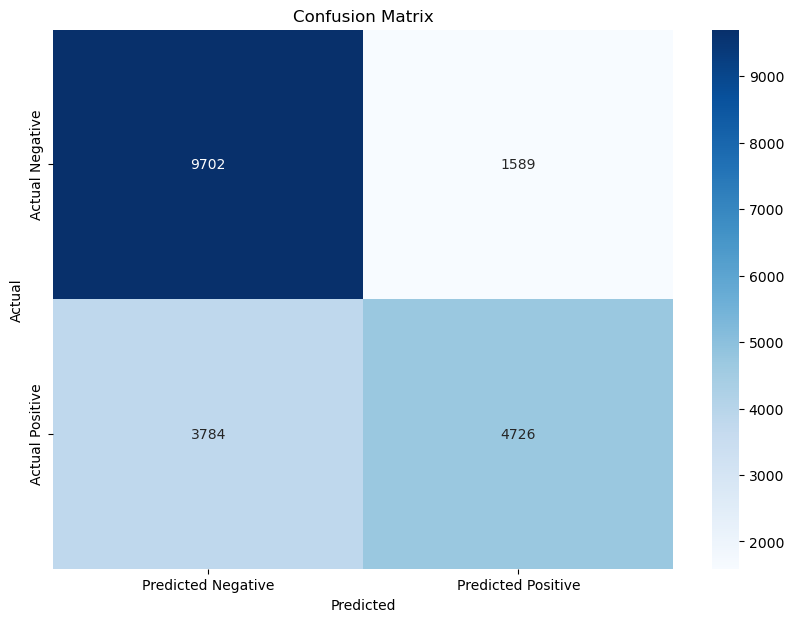

619/619 - 0s - loss: 0.4850 - accuracy: 0.7287 - 153ms/epoch - 246us/step
Test accuracy: 0.7286500930786133


In [ ]:
# Compute the confusion matrix to evaluate the model's performance
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap for better visualization
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Visualize the model's architecture using visualkeras
image = visualkeras.layered_view(model)
image.show()

#fn score

# Evaluate the model's performance on the test set and print the accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

The process of defining the architecture and parameters of our machine learning model was guided 
by both theoretical principles and empirical validation. 
Below outlines the rationale and methodologies employed:

Input and Output Configuration
Input Layer: The dimensionality was set based on the number of features in our dataset, ensuring that 
each input feature is represented in the model.
Output Layer: Tailored to the nature of our prediction task, we utilized a 
single neuron with a sigmoid activation function for binary 
classification tasks, and would opt for a softmax activation for multi-class scenarios.
Hidden Layers and Neurons
The architecture started with hidden layers whose neuron count was a balance between input size 
and the complexity required for the task. Initial configurations often considered the heuristic 
of setting the neuron count to an intermediate value relative to the input and output sizes.
Through iterative testing and validation, adjustments were made to 
optimize performance, striking a balance between model complexity and computational efficiency.
Activation Functions
Rectified Linear Unit was chosen for hidden layers to mitigate the 
vanishing gradient problem, promoting faster learning and improved model performance.
The sigmoid function was utilized in the output layer for binary classification, enabling the model to 
output probabilities between 0 and 1.

The choices made in the model, such as the use of dropout layers, are indicative 
of applying regularization techniques to combat overfitting. 
The specific parameters like the number of neurons in the layers and the dropout rate would typically be 
decided based on a combination of empirical rules, 
experimentation, and validation performance. 
Adjusting these based on the model's performance on a held-out validation set is crucial to finding a 
well-performing model configuration.